In [1]:
# import random
# import pydot
# import graphviz as gv
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# import sys
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install pydot graphviz

In [3]:
# pip list

In [4]:
def _draw_graph(Graph):
    Dimension = 1
    FigDimension = 5
    fig,axes = plt.subplots(nrows=Dimension,ncols=Dimension,figsize=(FigDimension,FigDimension),dpi=200)
    nx.draw(Graph, pos=nx.nx_pydot.graphviz_layout(Graph, prog="dot"), ax=axes, with_labels=True, edge_color='black', node_color='black', font_color='white')
    axes.set_title("Graph 0")

In [5]:
def _digraph_from_list_list(ListList):
    AdjacencyList = ""
    RowCounter = 0
    for row in ListList:
        AdjacencyList += f"{RowCounter}"
        ColumnCounter = 0
        for column in row:
            if RowCounter != ColumnCounter:
                if DataStream[RowCounter][ColumnCounter] == 1:
                    AdjacencyList += f" {ColumnCounter}"
            ColumnCounter += 1
        AdjacencyList += "\n"
        RowCounter += 1
    return nx.parse_adjlist(AdjacencyList.splitlines(), nodetype=int, create_using=nx.DiGraph())

In [6]:
def _reverse_transitivity_reduce(Graph):
    DiGraph = nx.DiGraph(Graph).copy()
    for TargetNode in DiGraph.nodes():
        for SourceNode in DiGraph.nodes():
            if SourceNode == TargetNode:
                continue
            if not DiGraph.has_edge(SourceNode, TargetNode):
                if nx.has_path(DiGraph, SourceNode, TargetNode):
                    DiGraph.add_edge(SourceNode, TargetNode)
    return DiGraph

In [7]:
def _transitivity_reduce(Graph):
    DiGraph = nx.DiGraph(Graph).copy()
    ValidEdges = []
    for Edge in DiGraph.edges():
        if (len(max(nx.all_simple_paths(DiGraph, Edge[0], Edge[1]), key=lambda x: len(x)))-1) == 1:
            ValidEdges.append(Edge)
    return DiGraph.edge_subgraph(ValidEdges)

In [8]:
def _listlist_from_digraph(DiGraph):
    listlist = []
    for Columns in range(DiGraph.number_of_nodes()):
        Column = []
        for Rows in range(DiGraph.number_of_nodes()):
            if Rows==Columns:
                Column.append(1)
            else:
                Column.append(0)
        listlist.append(Column)
    for Edge in nx.generate_edgelist(DiGraph, data=False):
        listlist[int(Edge.split(" ")[0])-1][int(Edge.split(" ")[1])-1] = 1
    return listlist

In [9]:
def _relabel(DiGraph):
    Mapping = dict()
    for Node in DiGraph.nodes():
        Mapping[Node] = Node+1
    return nx.relabel_nodes(DiGraph, Mapping, True)

Input matrix:
[1, 0, 0, 1, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


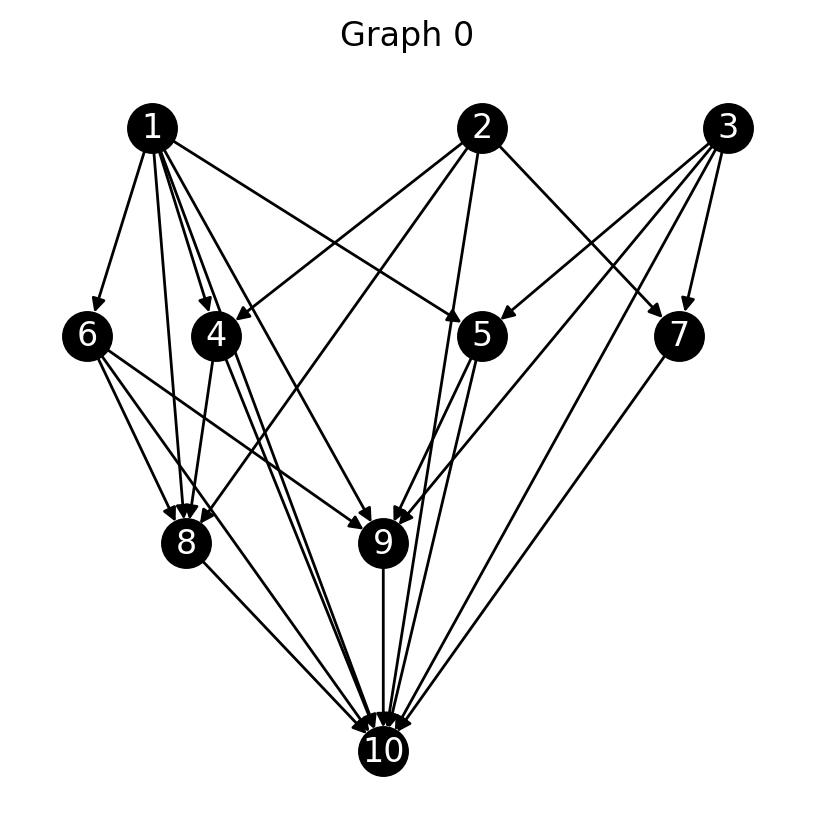

In [13]:
DataStream = [
    [1, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 0, 1]
]

DataStream = [
    [1, 1, 0, 1, 0, 0],
    [0, 1, 1, 0, 1, 0],
    [0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1]
]

DataStream = [
    [1, 0, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 1],
    [0, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
]

DataStream = [
    [1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
]

print("Input matrix:")
for row in DataStream:
    print(row)

DiGraph = (_digraph_from_list_list(DataStream))
# _draw_graph(DiGraph)
DiGraph = _relabel(_digraph_from_list_list(DataStream))
# _draw_graph(DiGraph)
OutputStream = (_listlist_from_digraph(DiGraph))
DiGraph = _reverse_transitivity_reduce(DiGraph)
_draw_graph(DiGraph)
# _draw_diagram(DiGraph)
OutputStream = (_listlist_from_digraph(DiGraph))

In [15]:
def _draw_diagram(Graph):
    
    BaseElements = []
    
    Distances = []
    for x in range(len(Graph)):
        temp = []
        for y in range(len(Graph)):
            temp.append(0)
        Distances.append(temp)
    
    for source in Graph:
        
        if Graph.in_degree(source) == 0:
            BaseElements.append(source)
            
        for target in Graph:
            if nx.has_path(Graph, source, target) and source != target:
                distance = len(max(nx.all_simple_paths(Graph, source, target), key=lambda x: len(x)))-1
                Distances[source-1][target-1] = distance
            else:
                Distances[source-1][target-1] = 0
    
    MaxX = 0
    MaxPlacedOnLevel = 0
    XOffset = 1
    Positions = dict()
    for Base in BaseElements:
        Positions[Base] = (MaxX,0)
        for distance in list(set(Distances[Base-1])):
            if distance <= 0:
                continue
            indices = [i for i in range(len(Distances[Base-1])) if Distances[Base-1][i] == distance]
            MaxPlacedOnLevel = max(len(indices), MaxPlacedOnLevel)
            for index in indices:
                if Positions.get(index+1) == None:
                    Positions[index+1] = (MaxX+(indices.index(index)*XOffset),distance)
        MaxX += (MaxPlacedOnLevel)*XOffset
    fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=200)
    nx.draw(_transitivity_reduce(Graph), pos=Positions, ax=axes, with_labels=True, edge_color='black', node_color='black', font_color='white')


In [ ]:
def _diagram_layout(Graph):
    
    BaseElements = []
    
    Distances = []
    for x in range(len(Graph)):
        temp = []
        for y in range(len(Graph)):
            temp.append(0)
        Distances.append(temp)
    
    for source in Graph:
        
        if Graph.in_degree(source) == 0:
            BaseElements.append(source)
            
        for target in Graph:
            if nx.has_path(Graph, source, target) and source != target:
                distance = len(max(nx.all_simple_paths(Graph, source, target), key=lambda x: len(x)))-1
                Distances[source-1][target-1] = distance
            else:
                Distances[source-1][target-1] = 0
    
    MaxX = 0
    MaxPlacedOnLevel = 0
    XOffset = 1
    Positions = dict()
    for Base in BaseElements:
        Positions[Base] = (MaxX,0)
        for distance in list(set(Distances[Base-1])):
            if distance <= 0:
                continue
            indices = [i for i in range(len(Distances[Base-1])) if Distances[Base-1][i] == distance]
            MaxPlacedOnLevel = max(len(indices), MaxPlacedOnLevel)
            for index in indices:
                if Positions.get(index+1) == None:
                    Positions[index+1] = (MaxX+(indices.index(index)*XOffset),distance)
        MaxX += (MaxPlacedOnLevel)*XOffset
    return Positions

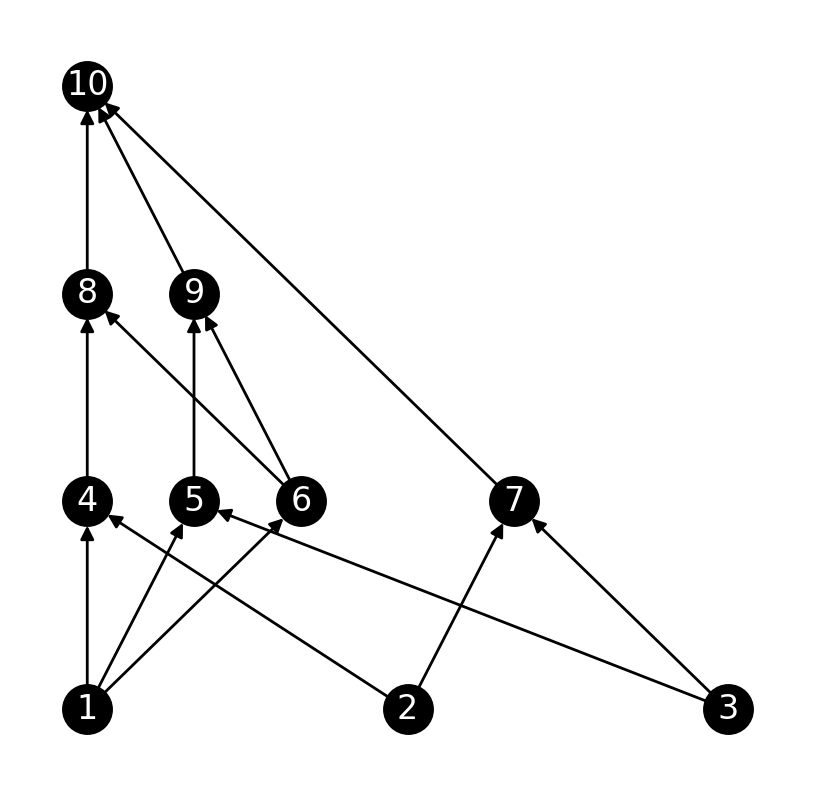

In [14]:
_draw_diagram(DiGraph)